# SQL - Structured Query Language

Antes de conhecermos mais instruções e cláusulas SQL, vamos criar um novo __Banco de Dados__ e suas respectivas tabelas.

Siga os passos abaixo:

* __Passo 1__: 
`CREATE DATABASE IF NOT EXISTS INFINITY;`

* __Passo 2__:
`USE INFINITY;`

* __Passo 3__:
```
CREATE TABLE IF NOT EXISTS STUDENTS_DETAILS(
    REGISTRATION INT(5) NOT NULL,
    NAME VARCHAR(30) NOT NULL,
    GENDER VARCHAR(1),
    AGE INT(3),
    EMAIL VARCHAR(50),
    PHONE VARCHAR(11),
    FEE DECIMAL(6,2)
);
```

* __Passo 4__:
```
CREATE TABLE IF NOT EXISTS STATES(
    STATE_ID INT(2) NOT NULL AUTO_INCREMENT,
    STATE VARCHAR(2) NOT NULL
);
```

* __Passo 5__:
```
CREATE TABLE IF NOT EXITS COURSES(
    COURSE_ID VARCHAR(3) NOT NULL,
    NAME VARCHAR(30) NOT NULL,
    TIME INT(2) NOT NULL
);
```

## TCL - Transaction Control Language

As instruções __COMMIT__ e __ROLLBACK__ foram apresentadas na aula anterior, porém, não as executamos no shell do MySQL e nem nos clientes SQL como o _Workbench_ e o _Beekeeper Studio_.

__VALE LEMBRAR__ : As instruções __DDL__ já possuem o _auto commit_ por padrão, ou seja, uma vez executado o comando, não conseguimos desfazer. 

Já para as instruções __DML__, podemos <u>_desligar_</u> o _auto commit_ com a seguinte configuração: `SET AUTOCOMMIT=0;`

Agora podemos criar mais uma tabela para testarmos estes comandos.

```
CREATE TABLE IF NOT EXISTS COUNTRIES(
    ID INT(2) NOT NULL PRIMARY KEY AUTO_INCREMENT, 
    INITIALS VARCHAR(2) NOT NULL
);

SELECT * FROM COUNTRIES;

INSERT INTO COUNTRIES (INITIALS) VALUES ('BR');

COMMIT;

INSERT INTO COUNTRIES (INITIALS) VALUES ('FR');

ROLLBACK;
```

## Ingestão de dados

Vimos, também, na aula passada que podemos inserir dados nas tabelas através da instrução __DML__ `INSERT INTO`, porém, na "_<u>vida real</u>_" é comum termos esses dados em arquivos CSV.

É possível inserir estes dados em nossas tabelas de forma automática sem precisarmos digitar TUDO? __Sim!!!__

Para isto, usaremos o comando `LOAD DATA`.

__SINTAXE__

```
LOAD DATA LOCAL INFILE 'path + filename' INTO TABLE TABLE_NAME
FIELDS TERMINATED BY ';' ENCLOSED BY '"' IGNORE 1 ROWS;
```

__ATENÇÃO__ : No Windows, devemos utilizar `\\` para separar os diretórios e o arquivo de modo que o sistema operacional entenda corretamente.

Já no Linux ou Mac, não há essa necessidade. Pode continuar utilizando a `/` normalmenete.

__OBS__ : No Workbench precisamos adicionar a seguinte configuração para que a ingestão de dados por arquivo funcione: `OPT_LOCAL_INFILE=1`

> Na página inicial do Workbench, clique com o botão direito do mouse sobre a conexão e clique em _edit connection_. Na tela que irá aparecer, clique na aba _advanced_ e insira a linha `OPT_LOCAL_INFILE=1` no campo Others.

No Linux, podemos adicionar uma entrada no arquivo _my.cnf_ que se localiza em `/etc/mysql/my.cnf`

```
[mysql]
local-infile=1
```

## DISTINTCT

A palavra-chave __distinct__ é usada em conjunto com a palavra-chave __select__. 

É útil quando há necessidade de evitar valores duplicados presentes em qualquer coluna/tabela específica. 

> Retorna apenas os valores exclusivos

### Vamos praticar!

__Prática__ Nº1

```
SELECT DISTINCT AGE FROM STUDENTS_DETAILS;

SELECT DISTINTC AGE FROM STUDENTS_DETAILS ORDER BY AGE;

SELECT DISTINC AGE FROM STUDENTS_DETAILS ORDER BY AGE DESC;
```

__Prática__ Nº2

```
SELECT COUNT(AGE) AS 'QUANTITY OF AGES' FROM STUDENTS_DETAILS;

SELECT COUNT(DISTINCT AGE) AS 'QUANTITY OF AGES' FROM STUDENTS_DETAILS;

SELECT COUNT(AGE) AS 'QUANTITY OF AGES', 
COUNT(DISTINCT AGE) AS 'QUANTITY OF UNIQUE AGES' 
FROM STUDENTS_DETAILS;
```

## GROUP BY

A instrução GROUP BY em SQL é usada para organizar dados idênticos em grupos com a ajuda de algumas funções. ou seja, se uma determinada coluna tiver os mesmos valores em linhas diferentes, ela organizará essas linhas em um grupo.

__VALE LEMBRAR__:

* A cláusula `GROUP BY` é usada com a instrução `SELECT`

* Na consulta, a cláusula `GROUP BY` é colocada após a cláusula `WHERE`

* Na consulta, a cláusula `GROUP BY` é colocada antes da cláusula `ORDER BY`, se usada

__Cláusula HAVING__

Sabemos que a cláusula `WHERE` é usada para colocar condições em colunas, ou seja, realiza o papel de filtro, mas e se quisermos colocar condições em grupos?

É aqui que a cláusula HAVING entra em uso!

Podemos usar a cláusula `HAVING` para colocar condições para decidir qual grupo fará parte do conjunto de resultados final. 

Também não podemos usar as funções de agregação como `SUM()`, `COUNT()` etc com a cláusula `WHERE`. 

> Portanto, temos que usar a cláusula `HAVING` se quisermos usar qualquer uma dessas funções nas condições

### Vamos praticar!

__Prática__ Nº1

```
SELECT GENDER, COUNT(GENDER) AS 'QUANTITY' FROM STUDENTS_DETAILS
GROUP BY GENDER;

SELECT GENDER, COUNT(GENDER) AS 'QUANTITY' FROM STUDENTS_DETAILS
GROUP BY GENDER ORDER BY QUANTITY DESC;
```

__Prática__ Nº2

```
SELECT FEE, COUNT(NAME) FROM STUDENTS_DETAILS GROUP BY FEE;

SELECT FEE, COUNT(NAME) FROM STUDENTS_DETAILS 
GROUP BY FEE 
HAVING FEE <> 0;

SELECT FEE, COUNT(NAME) FROM STUDENTS_DETAILS
GROUP BY FEE
HAVING FEE > 0 AND FEE < 1000;

SELECT FEE, COUNT(NAME) FROM STUDENTS_DETAILS
GROUP BY FLOOR(FEE)
HAVING FLOOR(FEE) = 250;
```

## INNER JOIN e LEFT JOIN

Conforme ganhamos mais conhecimento em SQL, conseguimos responder mais perguntas e assim gerar mais valor para as empresas. 

Porém, será muito comum em nossa jornada no mundo SQL nos depararmos com perguntas onde a resposta não está em uma única tabela. Precisaremos juntar duas ou mais tabelas para responder a estas questões.

Então como podemos fazer? 

É aí que lançaremos maõs do `INNER JOIN` e do `LEFT JOIN`.

Apesar de se falar que são instruções complexas e complicadas, o uso deles é bem simples e devemos nos basear na _teoria dos conjuntos_.

* __INNER JOIN__ : também podemos usar apenas a palavra chave `JOIN` para termos o mesmo efeito. Aqui o que vale é a interseção entre as duas ou mais tabelas

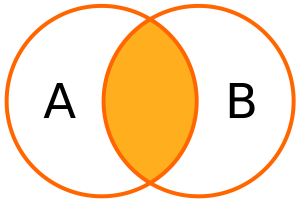

__SINTAXE__:

```
SELECT ALIAS1.COLUNA, ALIAS2.COLUNA FROM TABELA1 ALIAS1 
INNER JOIN TABELA2 ALIAS2 
ON ALIAS1.COLUNA = ALIAS2.COLUNA
```

* __LEFT JOIN__ : já aqui, dizemos ao SQL que desejamos todos os registros da tabela à esquerda - _mesmo os que não possuam correspondentes_ - além dos registros da interseção entre as tabelas

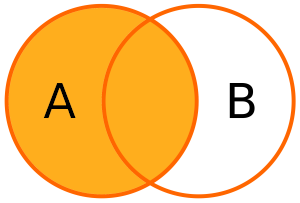

__SINTAXE__:

```
SELECT ALIAS1.COLUNA, ALIAS2.COLUNA FROM TABELA1 ALIAS1 
LEFT JOIN TABELA2 ALIAS2 
ON ALIAS1.COLUNA = ALIAS2.COLUNA
```

### Vamos praticar!

* __Passo 1__:

```
CREATE TABLE IF NOT EXISTS CITIES(
    CODE INT(2),
    NAME VARCHAR(30)
);

CREATE TABLE IF NOT EXISTS PEOPLE(
    NAME VARCHAR(30),
    CITY_CODE INT(2)
);

INSERT INTO CITIES (CODE, NAME) VALUES (1, 'Rio de Janeiro'), (2, 'Salvador');

INSERT INTO PEOPLE (NAME, CITY_CODE) VALUES 
  ('Rafael', 1),
  ('Camila', 2),
  ('Marcus', NULL);
```

* __Passo 2__:

```
SELECT P.NAME, C.NAME FROM PEOPLE P INNER JOIN
CITIES C ON P.CITY_CODE = C.CODE

SELECT P.NAME, C.NAME FROM PEOPLE P LEFT JOIN
CITIES C ON P.CITY_CODE = C.CODE
```